In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HRDataset.csv')
# data preperation and preprocessing 
df.drop(['LastPerformanceReview_Date', 'DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
# str to dates
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DOB']=df['DOB'].apply(lambda row: (row-np.timedelta64(100,'Y')) if (row>pd.datetime(2010,1,1)) else row)
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df.head()

<ipython-input-2-572306664c3f>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['DOB']=df['DOB'].apply(lambda row: (row-np.timedelta64(100,'Y')) if (row>pd.datetime(2010,1,1)) else row)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0


In [3]:
import datetime as dt

def count_seniority(row):
    
    if pd.isnull(row['DateofTermination']):
        end_date=dt.datetime(2019,9,27)
    else:
        
        end_date = row['DateofTermination']
        
    return (end_date-row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)

1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [4]:
df['PerformanceScore'].describe()

count             310
unique              4
top       Fully Meets
freq              243
Name: PerformanceScore, dtype: object

Text(0.5, 1.0, 'Performance Score: Number of employees supervised by the Manager')

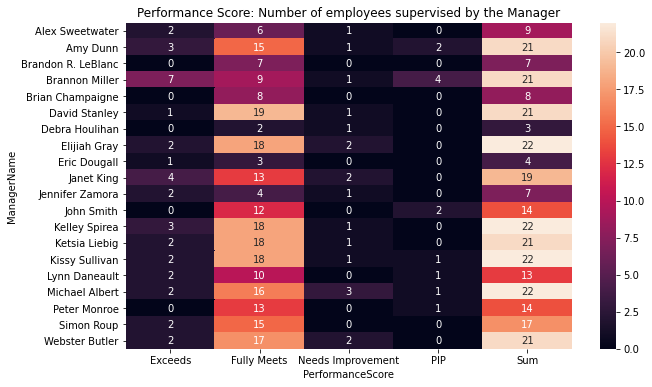

In [5]:
man=pd.crosstab(df['ManagerName'],df['PerformanceScore'])
man.drop('Board of Directors', axis=0, inplace=True)
plt.figure(figsize=(10,6))
man['Sum']=man.sum(axis=1)
sns.heatmap(man,annot=True, fmt=".0f")
plt.title('Performance Score: Number of employees supervised by the Manager')

Text(0.5, 1.0, 'Performance Score: Percentage share of Performance Score of employees')

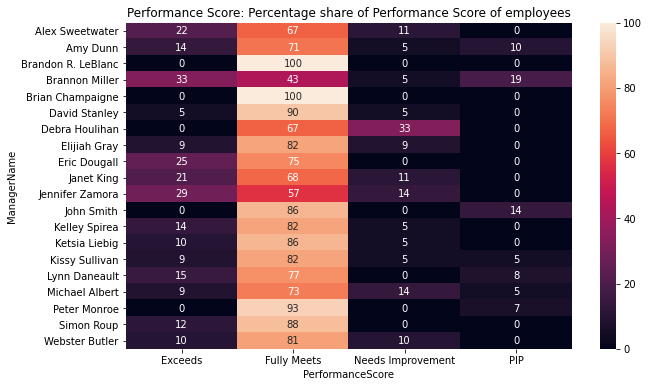

In [6]:
man.drop('Sum',axis=1,inplace=True)
man=man.apply(lambda row: ((row/sum(row))*100).round(0), axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(man,annot=True, fmt=".0f")
plt.title('Performance Score: Percentage share of Performance Score of employees')

In [7]:
man.median().round(1)

PerformanceScore
Exceeds              10.0
Fully Meets          81.5
Needs Improvement     5.0
PIP                   0.0
dtype: float64

Zdecydowanie dominującą oceną wyników w przedsiębiorstwie jest "Fully Meets (Requirements)". 82% pracowników (mediana) otrzymuje waśnie tę ocenę. Liczba pracowników za którą odpowiadają managerowie nie wpływa znacząco na rozkład ocen. Można wyróżnić pięciu managerów których ponad 20% pracowników otrzymało ocenę "Exceeds (Requirements). Jednak, w przypadju czterech z nich, część podopiecznych (10-14%) wymaga poprawy jakości pracy. Dwóch managerów odpowiada za pracowików którzy w 100% spełniają w pełni kryteria oceny, jednak  podlega im tylko 7-8 osób. 

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

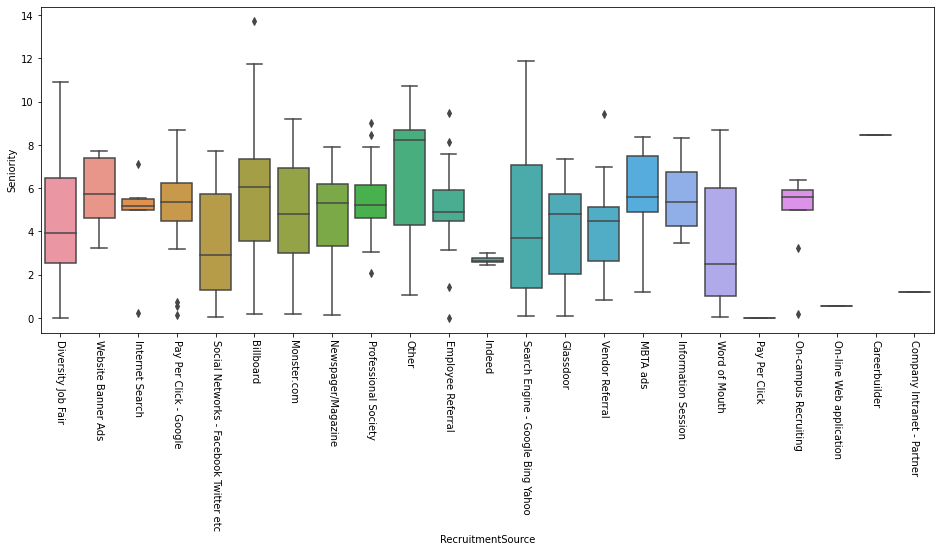

In [8]:
plt.figure(figsize=(16,6))
sns.boxplot(x='RecruitmentSource',y='Seniority',data=df)
plt.xticks(rotation=270)
plt.show()

In [9]:
dict_sen_req = {}
req=df['RecruitmentSource'].unique().tolist()
for i in req:
    dict_sen_req[i]=df['Seniority'][df['RecruitmentSource']==i].describe()

In [10]:
dict_sen_req

{'Diversity Job Fair': count    29.000000
 mean      4.492339
 std       3.061721
 min       0.005476
 25%       2.521612
 50%       3.928897
 75%       6.488840
 max      10.916035
 Name: Seniority, dtype: float64,
 'Website Banner Ads': count    13.000000
 mean      5.721594
 std       1.474789
 min       3.225254
 25%       4.610635
 50%       5.722226
 75%       7.408776
 max       7.715422
 Name: Seniority, dtype: float64,
 'Internet Search': count    6.000000
 mean     4.711482
 std      2.332581
 min      0.227246
 25%      4.993942
 50%      5.185596
 75%      5.516883
 max      7.113082
 Name: Seniority, dtype: float64,
 'Pay Per Click - Google': count    21.000000
 mean      5.009457
 std       2.304728
 min       0.158799
 25%       4.495643
 50%       5.377249
 75%       6.220525
 max       8.712020
 Name: Seniority, dtype: float64,
 'Social Networks - Facebook Twitter etc': count    11.000000
 mean      3.464697
 std       2.885358
 min       0.052020
 25%       1.278603
 

Analizując sposoby rekrutacji pod kątem najdłuższego stażu pracowników, wypada spojrzeć nie tylko na maksymalną długość stażu, ale również na rozkład danych dot. długości stażu m.in. mediany oraz wartości minimalnych. Najdłuższym stażem pracy (13.7 lat) może pochwalić się osoba rekrutowana przez 'Billboard'. W przypadku Billboard, median wynosi jedynie 6.0 lat. Następnie najdłuższe wartości stażu (11.9 lat) występują dla osób, które zostały rekrutowane przy użyciu wyszukiwarek (?) Google, Bing, Yahoo. Najwyższą medianą charakteryzuje się Careerbuilder, jednak w ten sposób została rekrutowana tylko jedna osoba, czego z punktu widzenia statystycznego nie można uznać za wystarczająco dużą próbę. Zatem, najlepszym pod kątem długości stażu są Inne metody ('Other'), dla których w 75% i 50% przypadków staż liczy odpowiednio 8.7 i 8.2 lat.

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [11]:
marital=pd.crosstab(df['MaritalDesc'],df['EmpSatisfaction'])
marital

EmpSatisfaction,1.0,2.0,3.0,4.0,5.0
MaritalDesc,,,,,
Divorced,0,1,6,14,9
Married,0,5,54,31,33
Separated,1,0,4,2,5
Single,1,3,44,40,49
Widowed,0,0,0,6,2


Text(0.5, 1.0, 'Percentage share of a Satisfaction Grade as a function of Marital Status')

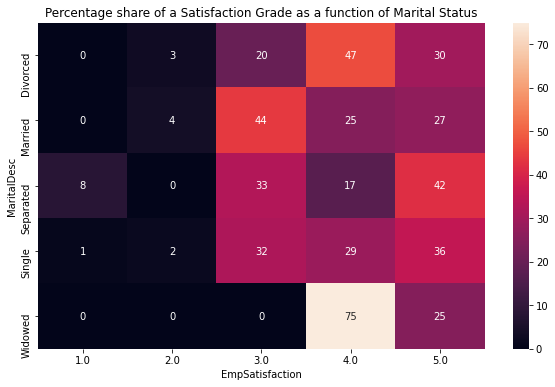

In [12]:
marital=marital.apply(lambda row: ((row/sum(row))*100).round(0), axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(marital,annot=True)
plt.title('Percentage share of a Satisfaction Grade as a function of Marital Status')

Z analizy wynika, że najbardziej usatysfakcjonowaną grupą są wdowcy. Należy jednak pamiętać, że jest to najmniej liczna grupa. Niewiele większą grupą są żyjący w separacji, dla których 33% badanych wykazuje zadowolenie z pracy na 3.0. Wygląda na to, że w danym zakładzie lepiej być wdowcem, niż żyć w separacji :) Porównując żyjących w separacji do rozwiedzionych, ci drudzy wykazują większe zadowolenie z pracy (łącznie 77% w zakresie 4.0-5.0 vs. 59% dla 4.0-5.0) - lepiej zatem zamykać od razu temat ;). Małżonkowie w aż 44% są zadowoleni z pracy wyłącznie na 3.0. Niezła socjologia! :))

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

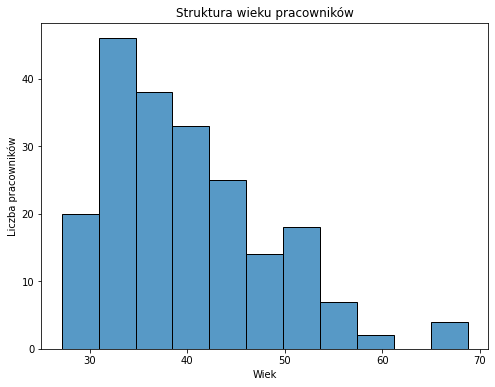

In [24]:
df=df[pd.isnull(df['DateofTermination'])]
df['Age'] = (dt.datetime(2019,9,27)-df['DOB'])/np.timedelta64(1,'Y')
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=11)
plt.ylabel('Liczba pracowników')
plt.xlabel('Wiek')
plt.title('Struktura wieku pracowników')
plt.show()

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [59]:
groups = df.groupby(['SpecialProjectsCount', pd.cut(df['Age'], np.arange(20,51,5))])
groups.size().unstack()

Age,"(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
SpecialProjectsCount,,,,,,
0.0,0,10,34,36,36,14
2.0,0,0,0,0,1,0
3.0,0,0,1,0,0,0
4.0,0,0,1,1,1,0
5.0,0,0,6,4,2,3
6.0,0,0,12,4,2,1
7.0,0,1,1,3,0,3
8.0,0,0,0,0,1,0


Tylko 1 pracownik w wieku do 30 lat zarządza 7 specjalnymi projektami. W grupie wiekowej 31-40 pojawia się największa ilość specjalnych projektów. Aż 16 osób z przedziału wiekowego 31-40 odpowiada za 6 projektów. Wraz z wiekiem liczba specjalnych projektów spada.